In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from matplotlib.cbook import boxplot_stats
from math import *

In [134]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.78
1,1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.60
2,2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.32
3,3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.76
4,4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.73


In [135]:
df = df.drop(["Unnamed: 0"], axis=1)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  200000 non-null  float64
 5   dropoff_latitude   200000 non-null  float64
 6   passenger_count    200000 non-null  int64  
 7   distance           200000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.2+ MB


In [137]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")

In [138]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance                         float64
dtype: object

In [139]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
dtype: int64

In [140]:
df = df.dropna()

## Outlier

Text(0, 0.5, 'fare')

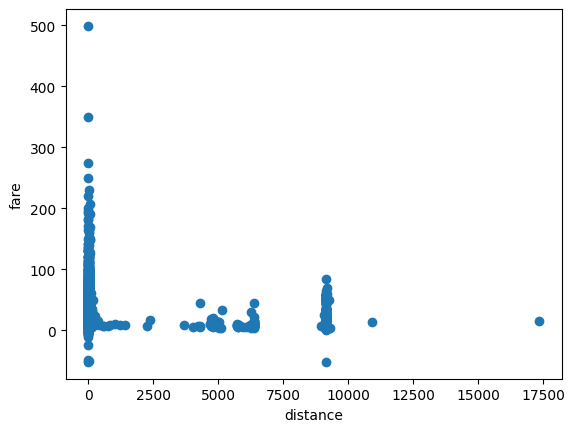

In [141]:
plt.scatter(df["distance"], df["fare_amount"])
plt.xlabel("distance")
plt.ylabel("fare")

In [142]:
def find_outliers(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [143]:
outliers = find_outliers(df['fare_amount'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:17167
max outlier value:499.0
min outlier value:-52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17167, dtype: float64

In [144]:
outliers = find_outliers(df['passenger_count'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:22557
max outlier value:208
min outlier value:4


4         5
6         5
12        5
24        5
29        5
         ..
199958    5
199959    5
199962    4
199969    5
199985    5
Name: passenger_count, Length: 22557, dtype: int64

In [145]:
#2 Handling outliers
df.drop(df[df["distance"] > 60].index, inplace = True)
df.drop(df[df["distance"] == 0].index, inplace = True)

df.drop(df[df["fare_amount"] == 0].index, inplace = True)
df.drop(df[df["fare_amount"] < 0].index, inplace = True)

# inplausible
df.drop(df[(df["fare_amount"] > 100) &  (df["distance"] < 1)].index, inplace = True)
df.drop(df[ (df["fare_amount"] < 100)  & (df["distance"] > 100) ].index , inplace = True)

Text(0, 0.5, 'fare')

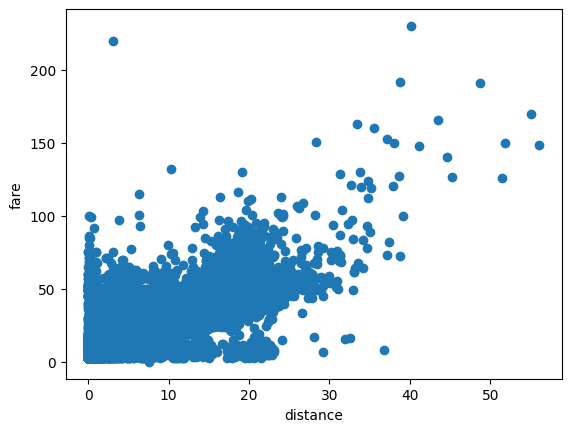

In [146]:
plt.scatter(df["distance"], df["fare_amount"]) # the perfect data in this assign
plt.xlabel("distance")
plt.ylabel("fare")

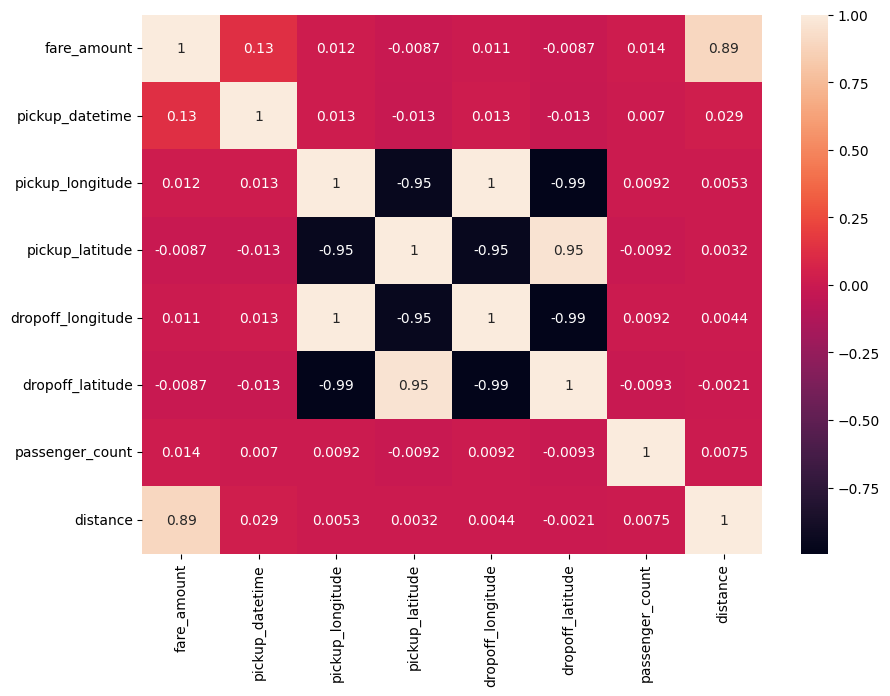

In [147]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [148]:
x = df[[ "distance"]]
y = df["fare_amount"]

In [149]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [151]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [ ]:
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [ ]:
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")